# Flight Fare Prediction

## To Predict the cost of the Flight Tickets

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')

### Understanding the Data

In [4]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Feature Engineering & Feature Selection

In [8]:
df_train[df_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [9]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [10]:
df_train['Total_Stops']=df_train['Total_Stops'].fillna('1 stop')

In [11]:
df_train[df_train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [12]:
df_train.shape, df_test.shape

((10683, 11), (2671, 10))

In [13]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
df_train.shape

(10683, 11)

In [15]:
df_train['Date']=df_train['Date_of_Journey'].str.split('/').str[0]
df_train['Month']=df_train['Date_of_Journey'].str.split('/').str[1]
df_train['Year']=df_train['Date_of_Journey'].str.split('/').str[2]

In [16]:
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [17]:
df_train['Date']=df_train['Date'].astype(int)
df_train['Month']=df_train['Month'].astype(int)
df_train['Year']=df_train['Year'].astype(int)

In [18]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [19]:
#Departure Time

df_train['Dep_Hour']=df_train['Dep_Time'].str.split(':').str[0]
df_train['Dep_Min']=df_train['Dep_Time'].str.split(':').str[1]

In [20]:
#Arrival Time
df_train['Arrival_Time']=df_train['Arrival_Time'].str.split(' ').str[0]

df_train['Arr_Hour']=df_train['Arrival_Time'].str.split(':').str[0]
df_train['Arr_Min']=df_train['Arrival_Time'].str.split(':').str[1]

In [21]:
df_train['Dep_Hour']=df_train['Dep_Hour'].astype(int)
df_train['Dep_Min']=df_train['Dep_Min'].astype(int)
df_train['Arr_Hour']=df_train['Arr_Hour'].astype(int)
df_train['Arr_Min']=df_train['Arr_Min'].astype(int)

In [22]:
df_train.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [23]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [25]:
df_train['Total_Stops']=df_train['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [26]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,16,50,21,35


In [27]:
df_train.drop(['Route'],axis=1,inplace=True)

In [28]:
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,16,50,21,35


In [29]:
#As Difference between Departure Time and Arrival Time is the Duration of Travel

df_train.drop(['Duration'],axis=1,inplace=True)

In [30]:
df_train.dtypes

Airline            object
Source             object
Destination        object
Total_Stops         int64
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Dep_Hour            int32
Dep_Min             int32
Arr_Hour            int32
Arr_Min             int32
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_train['Airline']=encoder.fit_transform(df_train['Airline'])
df_train['Source']=encoder.fit_transform(df_train['Source'])
df_train['Destination']=encoder.fit_transform(df_train['Destination'])

In [32]:
df_train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [33]:
#As 80% of data has Additional Info as None

df_train.drop(['Additional_Info'],axis=1,inplace=True)

In [34]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,3,0,5,0,3897,24,3,2019,22,20,1,10
1,1,3,0,2,7662,1,5,2019,5,50,13,15
2,4,2,1,2,13882,9,6,2019,9,25,4,25
3,3,3,0,1,6218,12,5,2019,18,5,23,30
4,3,0,5,1,13302,1,3,2019,16,50,21,35


In [35]:
df_train.dtypes

Airline        int32
Source         int32
Destination    int32
Total_Stops    int64
Price          int64
Date           int32
Month          int32
Year           int32
Dep_Hour       int32
Dep_Min        int32
Arr_Hour       int32
Arr_Min        int32
dtype: object

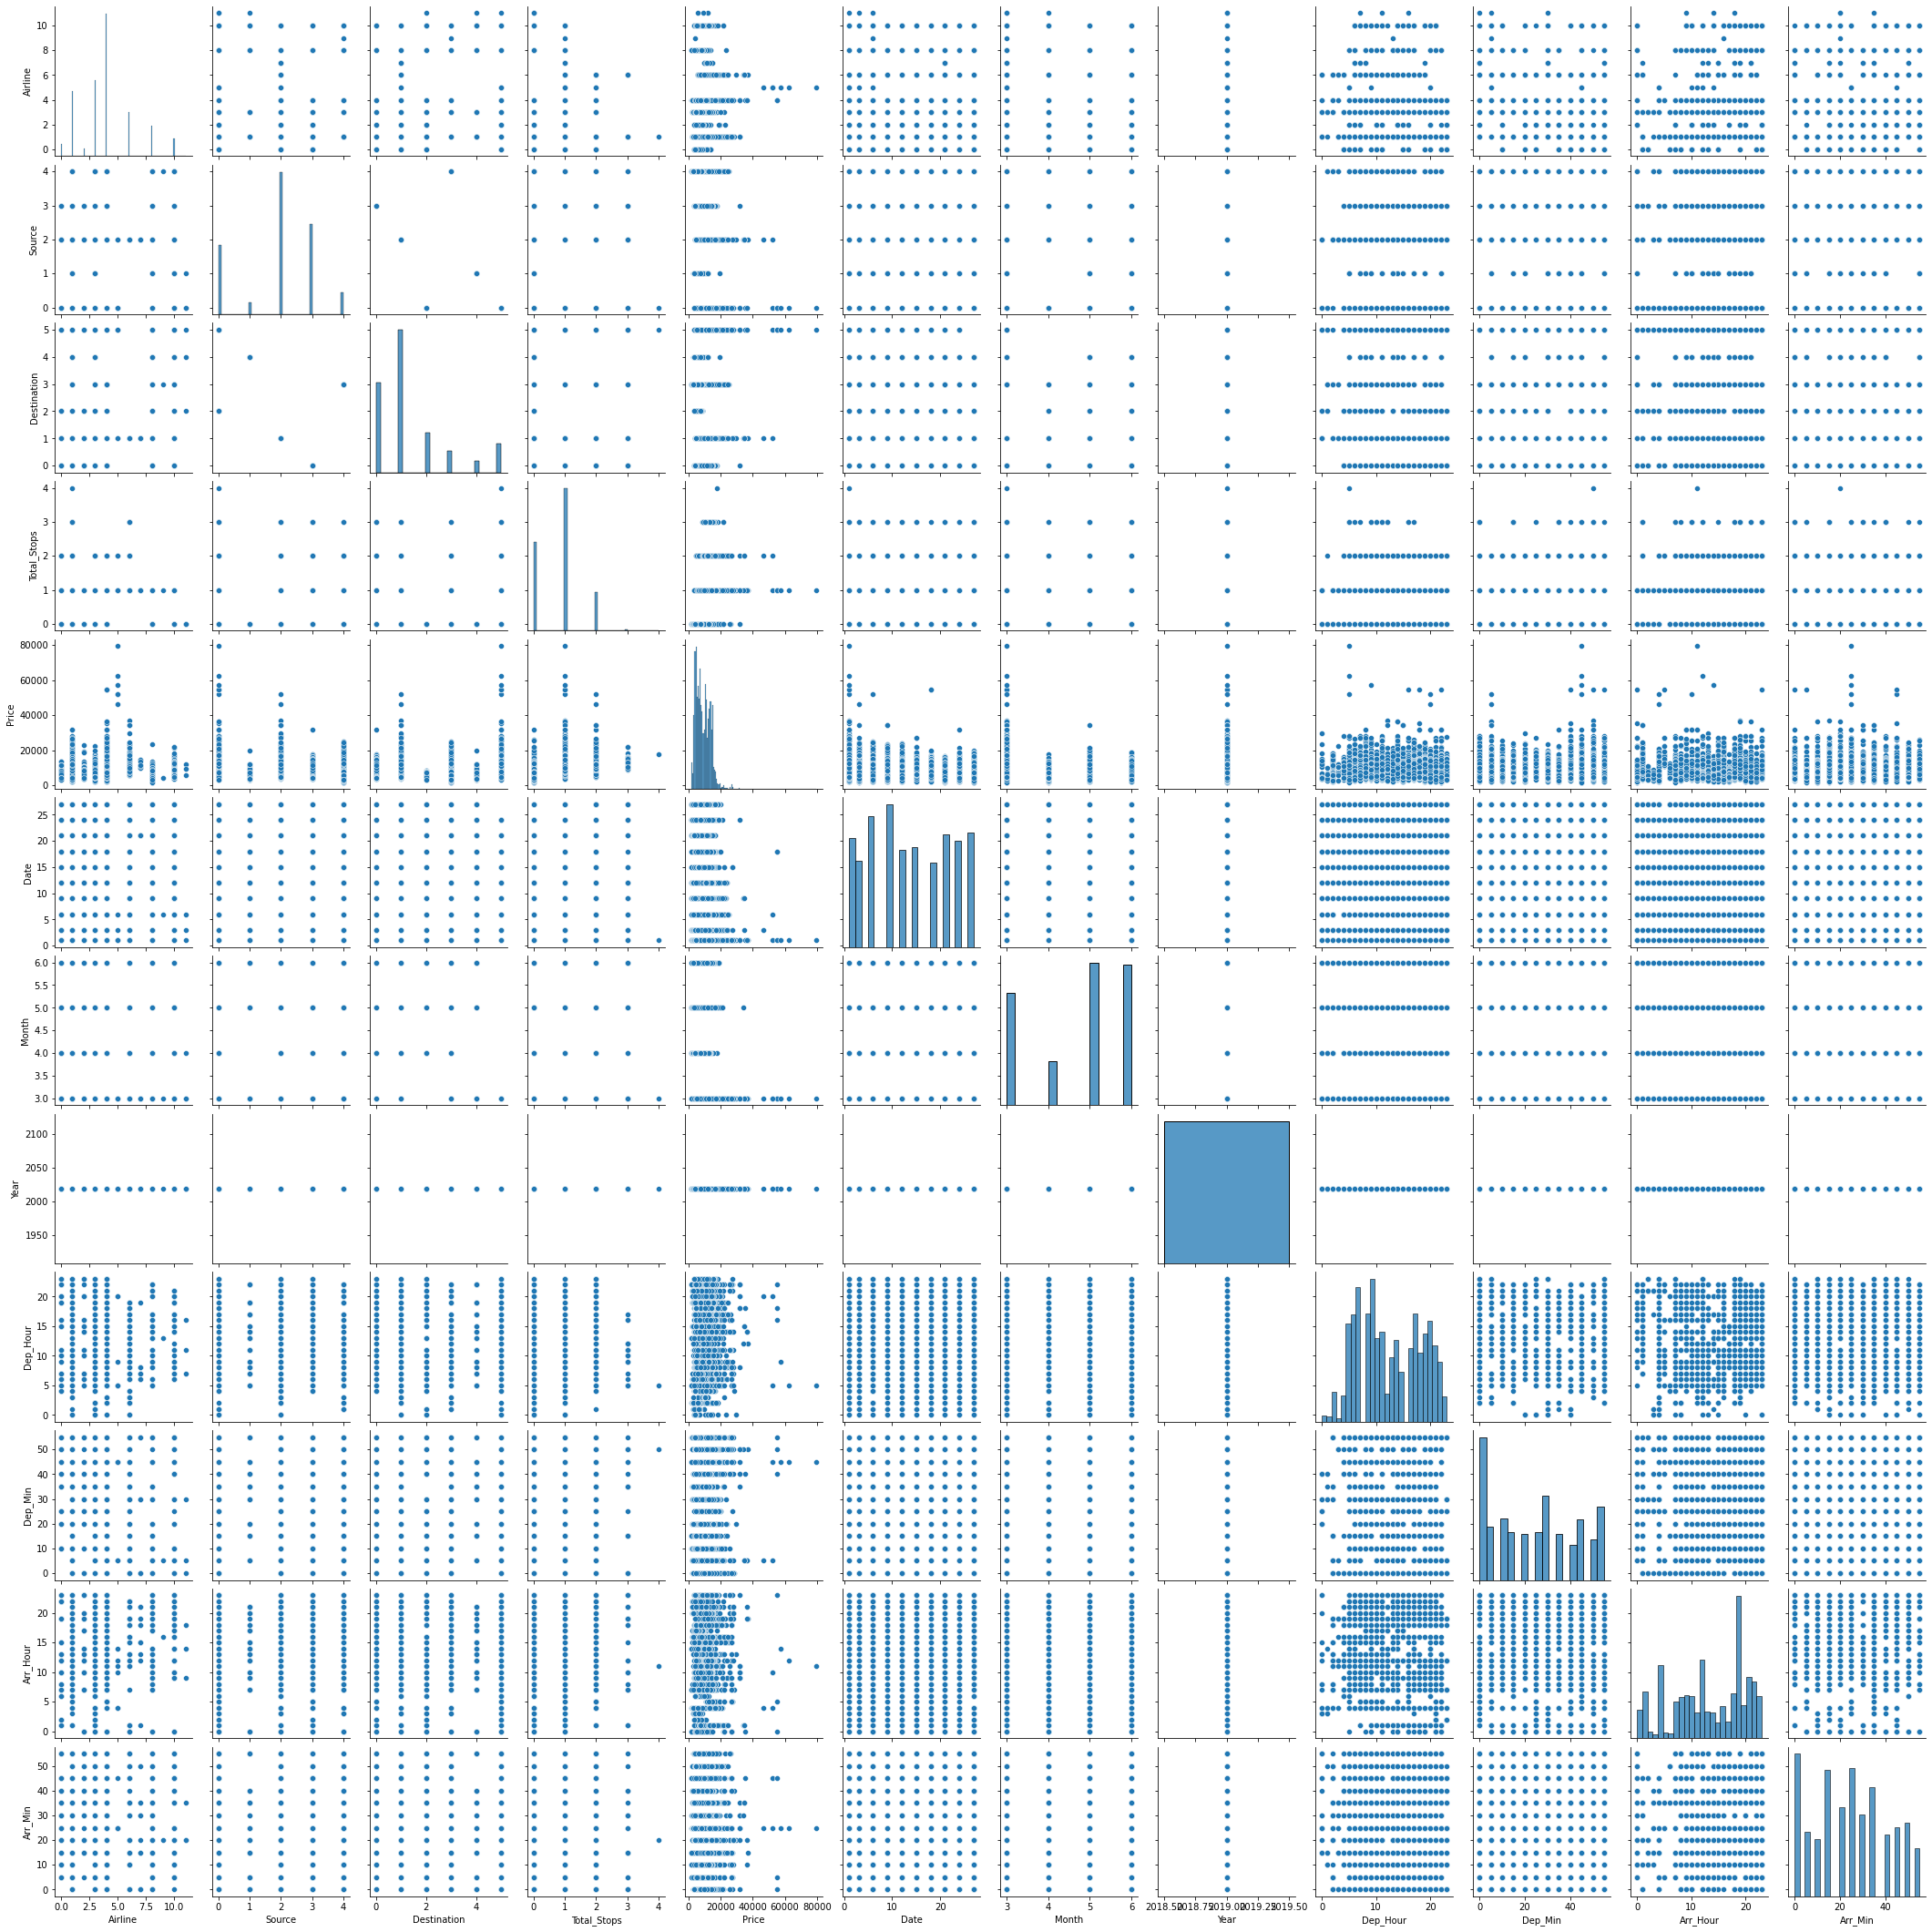

In [36]:
sns.pairplot(df_train)

In [37]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [38]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'Month', 'Year', 'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min'],
      dtype='object')

In [39]:
X=df_train.drop(['Price'],axis=1)
y=df_train['Price']

### Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [41]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [42]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [43]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])

In [44]:
features=X_train.columns[(model.get_support())]

In [45]:
features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Date', 'Month',
       'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min'],
      dtype='object')

In [46]:
X_train=X_train.drop(['Year'],axis=1)
X_test=X_test.drop(['Year'],axis=1)

### Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)

In [48]:
lr.score(X_train,y_train)

0.42298869593730937

In [49]:
lr.score(X_test,y_test)

0.43869809721554753

In [50]:
from sklearn.model_selection import cross_val_score
lr_score=cross_val_score(lr,X,y,cv=5)

In [51]:
lr_score.mean()

0.4264118035115437

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import math

In [53]:
print('MAE : ', mean_absolute_error(y_test,lr_pred))
print('MSE : ', mean_squared_error(y_test,lr_pred))
print('RMSE : ', math.sqrt(mean_absolute_error(y_test,lr_pred)))

MAE :  2489.9835102014913
MSE :  11369984.233772723
RMSE :  49.89973457045129


### Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_pred=rfr.predict(X_test)

In [55]:
rfr.score(X_train,y_train)

0.9560080246846179

In [56]:
rfr.score(X_test,y_test)

0.8046280488699158

In [57]:
from sklearn.model_selection import cross_val_score
rfr_score=cross_val_score(rfr,X,y,cv=5)

In [58]:
rfr_score.mean()

0.8178142125748586

In [59]:
print('MAE : ', mean_absolute_error(y_test,rfr_pred))
print('MSE : ', mean_squared_error(y_test,rfr_pred))
print('RMSE : ', math.sqrt(mean_absolute_error(y_test,rfr_pred)))

MAE :  1168.446928487884
MSE :  3957542.2656700145
RMSE :  34.182552983764744


In [60]:
#Hyperparameter Tuning

#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [61]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [62]:
rf=RandomForestRegressor()

rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                             scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,
                             random_state=0,n_jobs=1)

In [63]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   5.0s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=   4.6s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=   3.7s
[CV] n_estimators=400, min_samples_split=

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.6s
[CV] n_estimators=500, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [64]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [65]:
rf_random.best_score_

-3859088.139135983

In [66]:
rf_random_pred=rf_random.predict(X_test)

In [67]:
rf_random.score(X_train,y_train)

-1808635.4173386837

In [68]:
rf_random.score(X_test,y_test)

-3518555.2628104617

In [69]:
print('MAE : ', mean_absolute_error(y_test,rf_random_pred))
print('MSE : ', mean_squared_error(y_test,rf_random_pred))
print('RMSE : ', math.sqrt(mean_absolute_error(y_test,rf_random_pred)))

MAE :  1119.4465047867009
MSE :  3518555.2628104617
RMSE :  33.458130623014505


### XGBoost Regressor

In [70]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

In [71]:
xgb.score(X_train,y_train)

0.9396209316399089

In [72]:
xgb.score(X_test,y_test)

0.8160113018431013

In [73]:
from sklearn.model_selection import cross_val_score
xgb_score=cross_val_score(xgb,X,y,cv=5)

In [74]:
xgb_score.mean()

0.8446910479174419

In [75]:
print('MAE : ', mean_absolute_error(y_test,xgb_pred))
print('MSE : ', mean_squared_error(y_test,xgb_pred))
print('RMSE : ', math.sqrt(mean_absolute_error(y_test,xgb_pred)))

MAE :  1173.3397718408737
MSE :  3726957.964793579
RMSE :  34.254047524940376


In [76]:
#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
learning_rate=[0.05,0.1,0.2,0.3,0.5,0.6]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
subsample=[0.6,0.7,0.8]
min_child_weight=[3,4,5,6,7]

In [77]:
random_grid={'n_estimators':n_estimators,
            'learning_rate':learning_rate,
            'max_depth':max_depth,
            'subsample':subsample,
            'min_child_weight':min_child_weight}

In [78]:
xg=XGBRegressor()

xg_random=RandomizedSearchCV(estimator=xg,param_distributions=random_grid,
                             scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,
                             random_state=0,n_jobs=1)

In [79]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.2, total= 2.9min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s


[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.2, total=  53.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.2, total=  38.9s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.2, total=  38.7s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=20, learning_rate=0.2, total=  36.2s
[CV] subsample=0.6, n_estimators=600, min_child_weight=5, max_depth=15, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=600, min_child_weight=5, max_depth=15, learning_rate=0.2, total=  12.6s
[CV] su

[CV]  subsample=0.8, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5, total=   2.4s
[CV] subsample=0.8, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5, total=   2.5s
[CV] subsample=0.8, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.8, n_estimators=600, min_child_weight=4, max_depth=5, learning_rate=0.5, total=   2.6s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.6, total=   4.7s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.6 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.6, total=   4.5s
[CV] subsample=0.6, n_estimators=300, min_child_weight=6, max_depth=15, learning_rate=0.6 
[CV]  subsample=0.6,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.1min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [80]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 600,
 'min_child_weight': 4,
 'max_depth': 5,
 'learning_rate': 0.5}

In [81]:
xg_random.best_score_

-4506853.823560777

In [82]:
xg_random_pred=xg_random.predict(X_test)

In [83]:
xg_random.score(X_train,y_train)

-944556.4347845595

In [84]:
xg_random.score(X_test,y_test)

-4825456.784642334

In [85]:
print('MAE : ', mean_absolute_error(y_test,xg_random_pred))
print('MSE : ', mean_squared_error(y_test,xg_random_pred))
print('RMSE : ', math.sqrt(mean_absolute_error(y_test,xg_random_pred)))

MAE :  1315.9932245834755
MSE :  4825456.784642334
RMSE :  36.27662090911274


<AxesSubplot:xlabel='Price', ylabel='Density'>

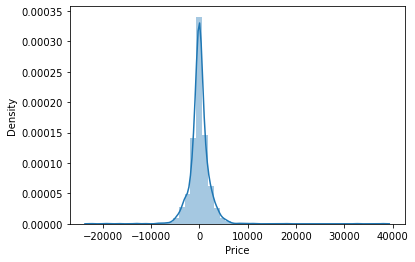

In [86]:
sns.distplot(y_test-xg_random_pred)

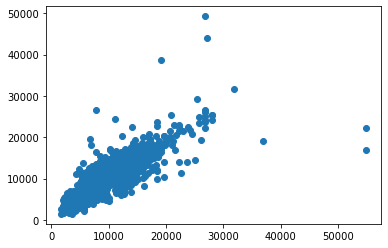

In [87]:
plt.scatter(y_test,xg_random_pred)

### Working on the Test Dataset

In [88]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [89]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [90]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [91]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [92]:
df_test[df_test['Total_Stops'].isnull()]
df_test['Total_Stops'].value_counts()
df_test['Total_Stops']=df_test['Total_Stops'].fillna('1 stop')
df_test[df_test['Total_Stops'].isnull()]
df_test.shape, df_test.shape
df_test.isnull().sum()
df_test.shape

df_test['Date']=df_test['Date_of_Journey'].str.split('/').str[0]
df_test['Month']=df_test['Date_of_Journey'].str.split('/').str[1]
df_test['Year']=df_test['Date_of_Journey'].str.split('/').str[2]

df_test.drop(['Date_of_Journey'],axis=1,inplace=True)
df_test['Date']=df_test['Date'].astype(int)
df_test['Month']=df_test['Month'].astype(int)
df_test['Year']=df_test['Year'].astype(int)
#Departure Time

df_test['Dep_Hour']=df_test['Dep_Time'].str.split(':').str[0]
df_test['Dep_Min']=df_test['Dep_Time'].str.split(':').str[1]

#Arrival Time
df_test['Arrival_Time']=df_test['Arrival_Time'].str.split(' ').str[0]

df_test['Arr_Hour']=df_test['Arrival_Time'].str.split(':').str[0]
df_test['Arr_Min']=df_test['Arrival_Time'].str.split(':').str[1]

df_test['Dep_Hour']=df_test['Dep_Hour'].astype(int)
df_test['Dep_Min']=df_test['Dep_Min'].astype(int)
df_test['Arr_Hour']=df_test['Arr_Hour'].astype(int)
df_test['Arr_Min']=df_test['Arr_Min'].astype(int)

df_test.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

df_test['Total_Stops']=df_test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

df_test.drop(['Route'],axis=1,inplace=True)

#As Difference between Departure Time and Arrival Time is the Duration of Travel

df_test.drop(['Duration'],axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_test['Airline']=encoder.fit_transform(df_test['Airline'])
df_test['Source']=encoder.fit_transform(df_test['Source'])
df_test['Destination']=encoder.fit_transform(df_test['Destination'])

df_test.drop(['Additional_Info'],axis=1,inplace=True)

In [93]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,4,2,1,1,6,6,2019,17,30,4,25
1,3,3,0,1,12,5,2019,6,20,10,20
2,4,2,1,1,21,5,2019,19,15,19,0
3,6,2,1,1,21,5,2019,8,0,21,0
4,0,0,2,0,24,6,2019,23,55,2,45


In [97]:
df_test.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Date', 'Month',
       'Year', 'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min'],
      dtype='object')

In [103]:
test_data=df_test[['Airline', 'Source', 'Destination', 'Total_Stops', 'Date', 'Month', 
                   'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min']]

In [104]:
test_data

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,4,2,1,1,6,6,17,30,4,25
1,3,3,0,1,12,5,6,20,10,20
2,4,2,1,1,21,5,19,15,19,0
3,6,2,1,1,21,5,8,0,21,0
4,0,0,2,0,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,6,6,20,30,20,25
2667,3,3,0,0,27,3,14,20,16,55
2668,4,2,1,1,6,3,21,50,4,25
2669,1,2,1,1,6,3,4,0,19,15


In [105]:
test_output=xg_random.predict(test_data)

In [111]:
test_data['Price']=test_output.round()

In [112]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Price
0,4,2,1,1,6,6,17,30,4,25,11350.0
1,3,3,0,1,12,5,6,20,10,20,4632.0
2,4,2,1,1,21,5,19,15,19,0,15465.0
3,6,2,1,1,21,5,8,0,21,0,10316.0
4,0,0,2,0,24,6,23,55,2,45,4283.0
